In [5]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
import matplotlib.colors as mcolors

In [6]:
#read csv on wild fire data and create DataFrame
fire_data_path=("ODF_Fire_Occurrence_Data_2000-2022 (1).csv")
fire_data=pd.read_csv(fire_data_path)
fire_data.head()



,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [7]:
# Our project only wants to review data in the last 5 years.
#Create copy of original csv
fire_data2= fire_data.copy()



In [8]:
#limit the year to the last 5 years (2022-5=2018 or greater
#reduce dataframe to remove data prior to 2018
fire_data2.drop(fire_data2.loc[fire_data2["FireYear"]<2018].index, inplace=True)
fire_data2.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
45,110203,STAT,2018,NOA,Astoria,Astoria,18-521071-18,Big O,A,0.01,...,Outside Closed Fire Season,06/03/2018 10:00:00 AM,06/04/2018 07:00:00 AM,06/04/2018 06:55:00 AM,06/04/2018 07:45:00 AM,06/04/2018 12:00:00 AM,06/04/2018 09:50:00 AM,52,521,071
46,113641,STAT,2018,NOA,North Cascade,Santiam,18-582069-19,Oak Knoll Rd,B,0.75,...,Lvl 1 Fire Season Only,10/23/2018 02:45:00 PM,10/23/2018 02:45:00 PM,10/23/2018 02:45:00 PM,10/23/2018 03:00:00 PM,10/23/2018 12:00:00 AM,11/06/2018 09:59:00 AM,58,582,069
47,110423,STAT,2018,SOA,Southwest Oregon,Medford,18-711502-18,Grizzly,A,0.10,...,Lvl 1 Fire Season Only,06/20/2018 03:19:00 PM,06/20/2018 07:55:00 PM,06/20/2018 07:50:00 PM,06/21/2018 02:50:00 AM,06/21/2018 12:00:00 AM,06/21/2018 03:29:00 PM,71,711,502
48,113120,STAT,2018,EOA,Central Oregon,Sisters,18-955070-19,Ponderosa Way 1207,A,NaN,...,NaN,NaN,09/24/2018 03:46:00 PM,NaN,NaN,09/24/2018 12:00:00 AM,09/24/2018 04:30:00 PM,95,955,070
49,110255,STAT,2018,EOA,Northeast Oregon,Wallowa,18-974052-18,Johnson Canyon,A,0.10,...,Outside Closed Fire Season,06/07/2018 08:17:00 PM,06/08/2018 06:25:00 AM,06/08/2018 06:17:00 AM,06/08/2018 04:00:00 PM,06/08/2018 12:00:00 AM,07/31/2018 04:44:00 PM,97,974,052


In [9]:
#export fire data as csv
fire_data2.to_csv("../Wildfires-OR-18.22.csv", index_label="fire_data2")

In [10]:
#list column names
list(fire_data2.columns)

['Serial',
 'FireCategory',
 'FireYear',
 'Area',
 'DistrictName',
 'UnitName',
 'FullFireNumber',
 'FireName',
 'Size_class',
 'EstTotalAcres',
 'Protected_Acres',
 'HumanOrLightning',
 'CauseBy',
 'GeneralCause',
 'SpecificCause',
 'Cause_Comments',
 'Lat_DD',
 'Long_DD',
 'LatLongDD',
 'FO_LandOwnType',
 'Twn',
 'Rng',
 'Sec',
 'Subdiv',
 'LandmarkLocation',
 'County',
 'RegUseZone',
 'RegUseRestriction',
 'Industrial_Restriction',
 'Ign_DateTime',
 'ReportDateTime',
 'Discover_DateTime',
 'Control_DateTime',
 'CreationDate',
 'ModifiedDate',
 'DistrictCode',
 'UnitCode',
 'DistFireNumber']

In [11]:
fire_data2.dtypes



Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
Ign_DateTime  

In [12]:
#change data types for time
fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])

In [13]:
#Calculate timespan of burn (control time - ign time)
timespan=(fire_data2['Control_DateTime']-fire_data2['Ign_DateTime'])

In [14]:
#create group by variables
year=fire_data2["FireYear"]
Acres=(fire_data2["EstTotalAcres"])/1000
Human=fire_data2["HumanOrLightning"]
Gen_Cause=fire_data2["GeneralCause"]
SP_Cause=fire_data2["SpecificCause"]
county=fire_data2["County"]
name=fire_data2["FireName"]

In [15]:
#create dataframe
county_data=pd.DataFrame({"Year": year,
                          "County": county,
                          "Fire Name": name,
                          "Human or Nature": Human,
                          "Cause of Fire": Gen_Cause,
                          "Specifics": SP_Cause,
                          "Time Burning": timespan,
                          "Acres per 1000" : Acres})

county_data

,Year,County,Fire Name,Human or Nature,Cause of Fire,Specifics,Time Burning,Acres per 1000
45,2018,Clatsop,Big O,Human,Debris Burning,Unattended,0 days 21:45:00,0.00001
46,2018,Marion,Oak Knoll Rd,Human,Debris Burning,Other - Burning Related,0 days 00:15:00,0.00075
47,2018,Jackson,Grizzly,Lightning,Lightning,Lightning,0 days 11:31:00,0.00010
48,2018,Deschutes,Ponderosa Way 1207,Human,Miscellaneous,NaN,NaT,NaN
49,2018,Wallowa,Johnson Canyon,Lightning,Lightning,Lightning,0 days 19:43:00,0.00010
...,...,...,...,...,...,...,...,...
23485,2021,Klamath,Road 2430,Human,Equipment Use,Heat from Vehicle Manifold or Exhaust,0 days 05:58:00,0.00075
23486,2022,Lane,Spruce Path,Human,Recreation,"Campfire Left Unattended (camp site, cooking)",0 days 00:54:00,0.00001
23487,2021,Umatilla,Bone Canyon,Lightning,Lightning,Lightning,3 days 23:48:00,0.06743
23488,2022,Umatilla,Milepost 231,Human,Equipment Use,Burning Vehicle or Equipment,0 days 01:32:00,0.00010


In [16]:
#create chart to show number of fires by year

fig1=county_data[["Year", "County"]]
fig1

,Year,County
45,2018,Clatsop
46,2018,Marion
47,2018,Jackson
48,2018,Deschutes
49,2018,Wallowa
...,...,...
23485,2021,Klamath
23486,2022,Lane
23487,2021,Umatilla
23488,2022,Umatilla


In [17]:
#Create list of counties and the number of fires in each county
Number_of_Fires= county_data["County"].value_counts()
Number_of_Fires

County
Josephine      796
Jackson        742
Douglas        576
Lane           467
Klamath        381
Coos           237
Deschutes      162
Linn           157
Grant          151
Clackamas      146
Wallowa        139
Clatsop        101
Umatilla        88
Wasco           80
Marion          77
Columbia        75
Union           73
Hood River      66
Curry           65
Lake            63
Wheeler         57
Baker           54
Polk            52
Yamhill         49
Tillamook       48
Crook           45
Benton          43
Lincoln         43
Washington      38
Jefferson       32
Morrow          15
Multnomah        8
Other State      4
Harney           3
ERROR: #N/A      3
Malheur          1
Name: count, dtype: int64

In [18]:
#create chart to show number of fires in each county, each year
fire_data_by_year_s=county_data.groupby(["County","Year"]).count()["Fire Name"]
fire_data_by_year_s


County   Year
Baker    2018     8
         2019     8
         2020    13
         2021    18
         2022     7
                 ..
Yamhill  2018    12
         2019     8
         2020    10
         2021    14
         2022     5
Name: Fire Name, Length: 166, dtype: int64

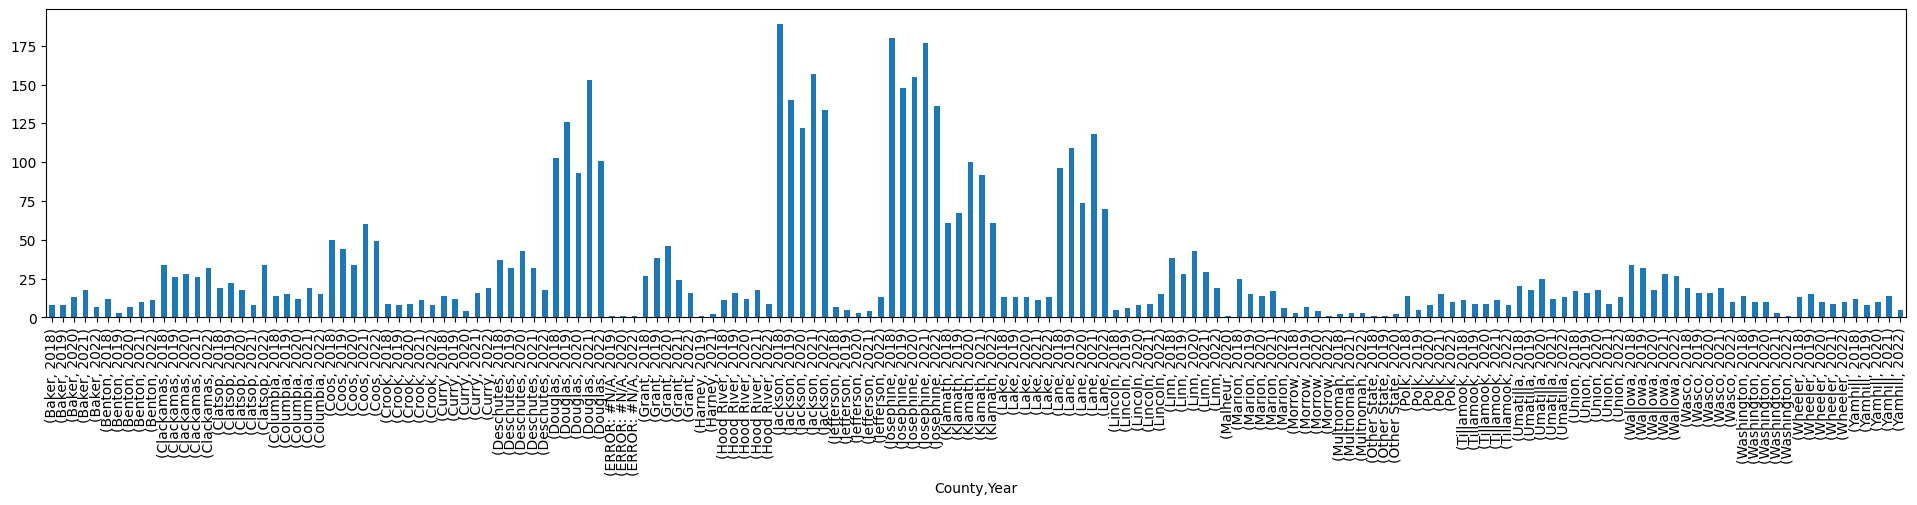

In [19]:
fire_data_by_year_s.plot(kind="bar", figsize=(24,4))
plt.show()

In [20]:
#Fires by county
fires_by_county_s = county_data.groupby("County").count()["Fire Name"]
fires_by_county_s

County
Baker           54
Benton          43
Clackamas      146
Clatsop        101
Columbia        75
Coos           237
Crook           45
Curry           65
Deschutes      162
Douglas        576
ERROR: #N/A      3
Grant          151
Harney           3
Hood River      66
Jackson        742
Jefferson       32
Josephine      796
Klamath        381
Lake            63
Lane           467
Lincoln         43
Linn           157
Malheur          1
Marion          77
Morrow          15
Multnomah        8
Other State      4
Polk            52
Tillamook       48
Umatilla        88
Union           73
Wallowa        139
Wasco           80
Washington      38
Wheeler         57
Yamhill         49
Name: Fire Name, dtype: int64

In [21]:
#Create chart to show # of fires per year with the number of acres burned each year
#create variable/group to capture how many fires were ignited each year
fires_by_year_s=county_data.groupby(["Year"]).count()["Fire Name"]
fires_by_year_s

Year
2018    1112
2019    1020
2020     983
2021    1134
2022     888
Name: Fire Name, dtype: int64

In [22]:
#create variable to show how many acres were burned each year
acres_by_year_s = county_data.groupby(["Year"]).sum()["Acres per 1000"]
acres_by_year_s


Year
2018     461.53695
2019      17.24732
2020    1149.39845
2021     676.26907
2022     208.89972
Name: Acres per 1000, dtype: float64

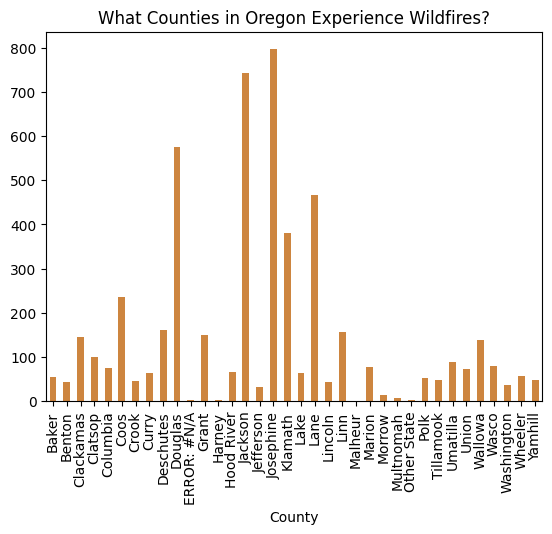

In [32]:
fires_by_county_s.plot(kind="bar", color="peru")
plt.title("What Counties in Oregon Experience Wildfires?")
plt.show()

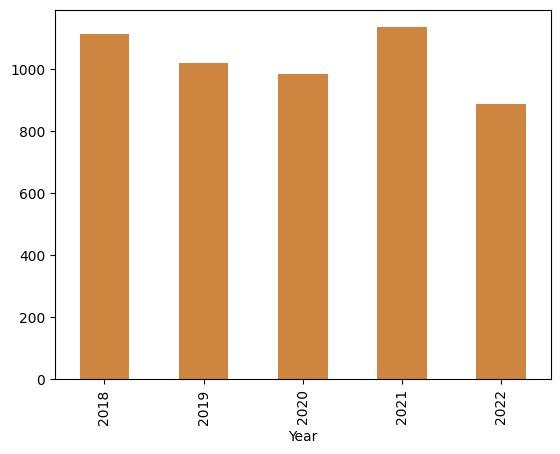

In [24]:
fires_by_year_s.plot(kind="bar", color="peru")

plt.show()

In [25]:
#Merge together number of fires and acres burned
double_year_df = pd.DataFrame({
    "Number of Fires": fires_by_year_s,
    "Acres Burned per 1000": acres_by_year_s
})
double_year_df

,Number of Fires,Acres Burned per 1000
Year,,
2018,1112,461.53695
2019,1020,17.24732
2020,983,1149.39845
2021,1134,676.26907
2022,888,208.89972


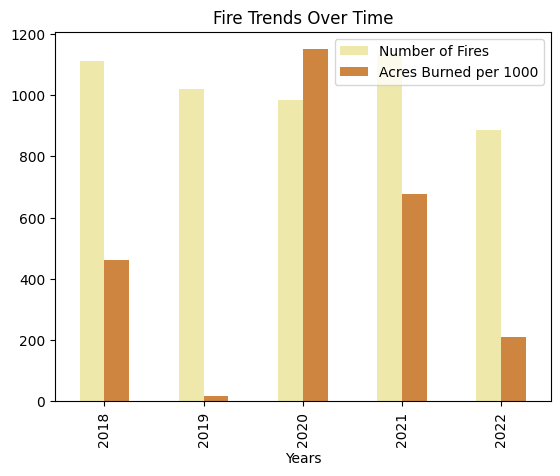

In [26]:
#Chart dataframe
double_year_df.plot(kind="bar", title="Fire Trends Over Time", xlabel="Years", color=("palegoldenrod", "peru"))
plt.show()

In [27]:
#create count of reasons fire was ignited
Count_of_Fire_Count= county_data.groupby(["Human or Nature"]).count()["Cause of Fire"]
Count_of_Fire_Count


Human or Nature
Human           4017
Lightning       1105
Under Invest      15
Name: Cause of Fire, dtype: int64

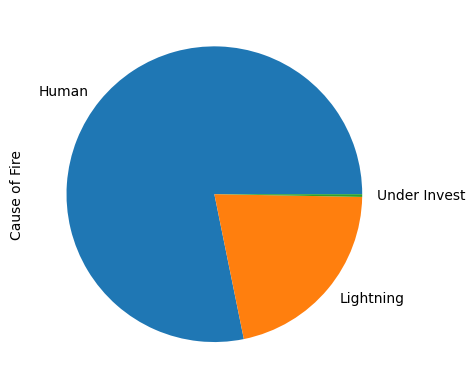

In [28]:
plot = Count_of_Fire_Count.plot.pie()
plt.show()


In [29]:
#Create chart for reasons of fire
Cause=county_data.groupby("Cause of Fire").count()["Year"]
Cause

Cause of Fire
Arson              192
Debris Burning    1130
Equipment Use     1188
Juveniles           39
Lightning         1105
Miscellaneous      584
Railroad            20
Recreation         629
Smoking            170
Under Invest        80
Name: Year, dtype: int64

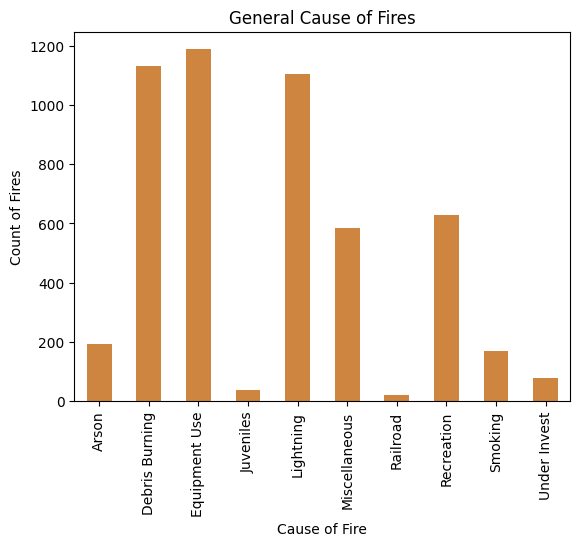

In [30]:
Cause.plot(kind="bar", color="peru", xlabel="Cause of Fire", ylabel="Count of Fires", title=("General Cause of Fires"))
plt.show()

In [31]:
specific_df = pd.DataFrame({
    "General": county_data["Cause of Fire"]
    "Specific": county_data["Specifics"]
})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1682922910.py, line 2)